関数定義

In [25]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import normalized_root_mse
from skimage.metrics import hausdorff_distance

def EvalImgs(true_img_path, target_img_path):
    true_img = cv2.imread(true_img_path)
    target_img = cv2.imread(target_img_path)

    # convert to grayscale
    true_img_gray = cv2.cvtColor(true_img, cv2.COLOR_BGR2GRAY)
    target_img_gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)

    # calculate SSIM
    ssim_score = structural_similarity(true_img_gray, target_img_gray)
    print(f'SSIM: {ssim_score}')

    # calculate MSE
    mse_score = mean_squared_error(true_img_gray, target_img_gray)
    print(f'MSE: {mse_score}')

    # calculate PSNR
    psnr_score = peak_signal_noise_ratio(true_img_gray, target_img_gray)
    print(f'PSNR: {psnr_score}')

    # calculate NRMSE
    nrmse_score = normalized_root_mse(true_img_gray, target_img_gray)
    print(f'NRMSE: {nrmse_score}')

    # calculate HD
    hd_score = hausdorff_distance(true_img_gray, target_img_gray)
    print(f'HD: {hd_score}')

    return ssim_score, mse_score, psnr_score, nrmse_score, hd_score

Pathの指定

In [26]:
TRUE_PATH = "./original/240613_2204_EGFP.tiff"
TRRGET_PATHs = ["./SIREN3/1024_model_output.tiff", 
                "./SIREN7/1024_model_output.tiff", 
                "./NNI/240613_2204_EGFP_resized_512x512_no_resize_1024x1024.png"]

./SIREN3/1024_model_output.tiff
SSIM: 0.5435298894587545
MSE: 1337.5043106079102
PSNR: 16.867851704959808
NRMSE: 0.2839117211587276
HD: 2.23606797749979


./SIREN7/1024_model_output.tiff
SSIM: 0.6008066087895297
MSE: 1123.0156736373901
PSNR: 17.626945432291347
NRMSE: 0.26015287885572486
HD: 1.0


./NNI/240613_2204_EGFP_resized_512x512_no_resize_1024x1024.png
SSIM: 0.6426498843576396
MSE: 877.3155040740967
PSNR: 18.6992455651296
NRMSE: 0.22993952481401808
HD: 0.0


  Target Path    ↑ SSIM        ↓ MSE     ↑ PSNR   ↓ NRMSE        HD
0      SIREN3  0.543530  1337.504311  16.867852  0.283912  2.236068
1      SIREN7  0.600807  1123.015674  17.626945  0.260153  1.000000
2         NNI  0.642650   877.315504  18.699246  0.229940  0.000000


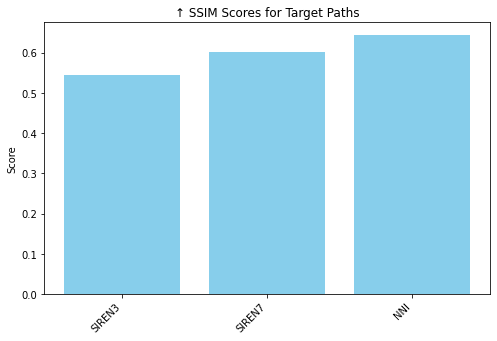

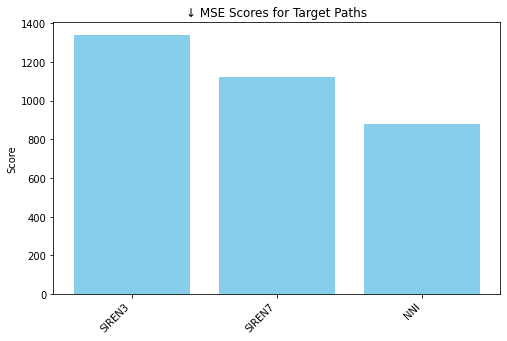

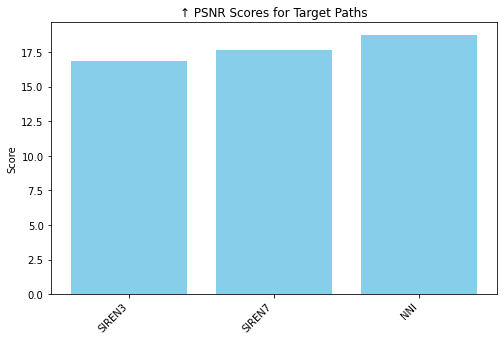

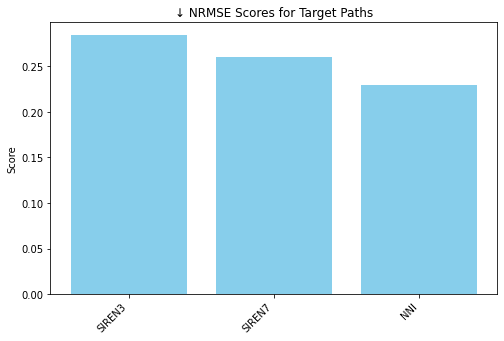

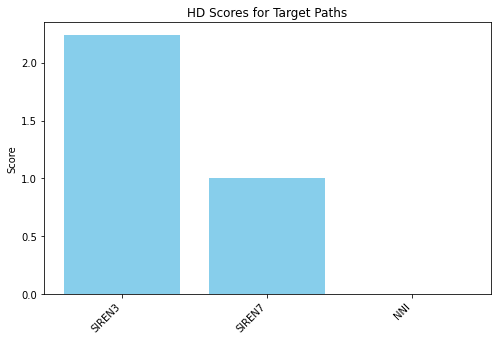

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# 結果を保存するリスト
results = []
labels = ["↑ SSIM", "↓ MSE", "↑ PSNR", "↓ NRMSE", "HD"]

for target_path in TRRGET_PATHs:
    print(target_path)
    ssim, mse, psnr, nrmse, hd = EvalImgs(TRUE_PATH, target_path)
    results.append([target_path.split("/")[1], ssim, mse, psnr, nrmse, hd])
    print("\n")
    
# DataFrameの作成
df = pd.DataFrame(results, columns=["Target Path"] + labels)
print(df)

# 指標ごとに別々の棒グラフを作成
for label in labels:
    plt.figure(figsize=(8, 5))
    plt.bar(df["Target Path"], df[label], color='skyblue')
    plt.ylabel("Score")
    plt.title(f"{label} Scores for Target Paths")
    plt.xticks(rotation=45, ha='right')
    plt.show()